# Logistic Regression

## The dataset used is the Pima Indians Diabetes Database

### The purpose of this analysis is to build a Machine Learning model Logistic Regression to accurately predict whether patients in the dataset suffer from diabetes or not by using independent variables that influence the patient's decision to diagnose diabetes or not.


#### Import Dataset and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv('F:\Learn Python\Data\diabetes.csv')
data.isnull().values.any()

False

In [3]:
print(data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.shape

(768, 9)

### Exploratory Data

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

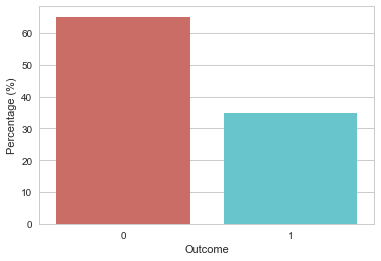

In [8]:
sns.barplot(x ='Outcome',y='Outcome', data = data, estimator = lambda x: len(x)/len(data)*100, palette = 'hls').\
set(ylabel='Percentage (%)')

plt.show()

In [9]:
data_positive = data.where(data['Outcome']==1).dropna()
data_negative = data.where(data['Outcome']==0).dropna()

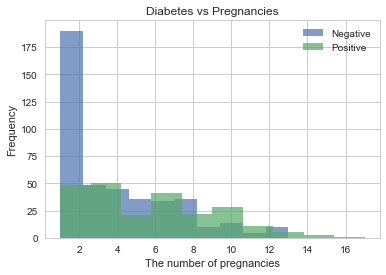

In [10]:
plt.hist(data_negative.Pregnancies[data_negative.Pregnancies!=0], alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Pregnancies[data_positive.Pregnancies!=0], alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Pregnancies')
plt.xlabel('The number of pregnancies')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

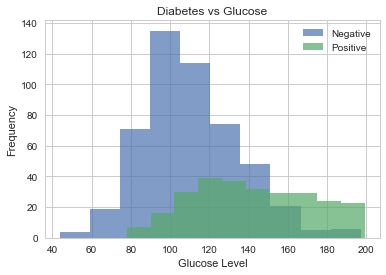

In [11]:
plt.hist(data_negative.Glucose[data_negative.Glucose>0], alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Glucose[data_positive.Glucose>0], alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

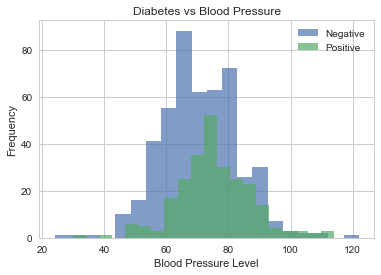

In [12]:
plt.hist(data_negative.BloodPressure[data_negative.BloodPressure>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.BloodPressure[data_positive.BloodPressure>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Blood Pressure')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

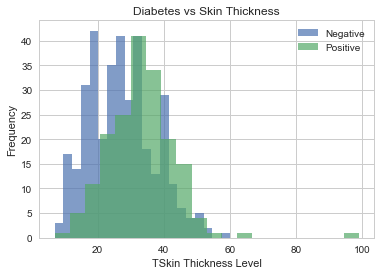

In [13]:
plt.hist(data_negative.SkinThickness[data_negative.SkinThickness>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.SkinThickness[data_positive.SkinThickness>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Skin Thickness')
plt.xlabel('TSkin Thickness Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

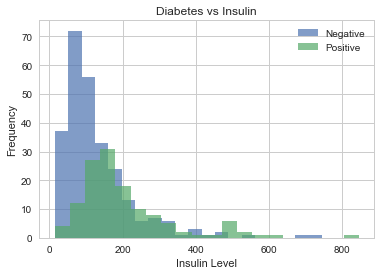

In [14]:
plt.hist(data_negative.Insulin[data_negative.Insulin>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Insulin[data_positive.Insulin>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

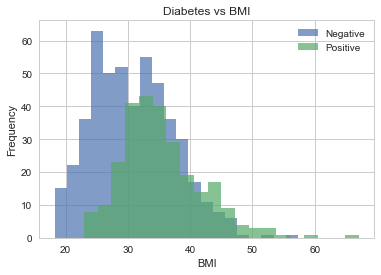

In [15]:
plt.hist(data_negative.BMI[data_negative.BMI>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.BMI[data_positive.BMI>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

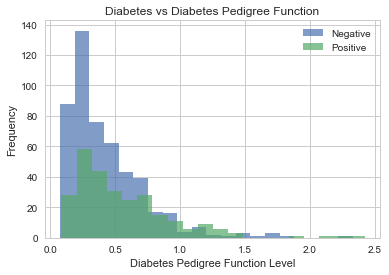

In [16]:
plt.hist(data_negative.DiabetesPedigreeFunction[data_negative.DiabetesPedigreeFunction>0], bins =20, alpha = 0.7,\
         label = 'Negative')
plt.hist(data_positive.DiabetesPedigreeFunction[data_positive.DiabetesPedigreeFunction>0], bins =20, alpha = 0.7, \
         label = 'Positive')
plt.title('Diabetes vs Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

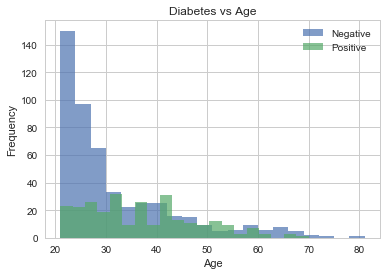

In [17]:
plt.hist(data_negative.Age[data_negative.Age>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Age[data_positive.Age>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

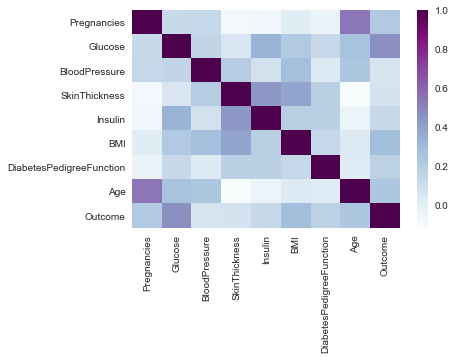

In [18]:
# Describe the correlation among features in dataset
sns.heatmap(data.corr(), cmap = 'BuPu')
plt.show()

### Classification data with logistic regression

In [19]:
X = data.iloc[:,:7]
y = data.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',conf_matrix)
print('Accuracy of logistic regression on test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

Confusion matrix:
 [[142  15]
 [ 35  39]]
Accuracy of logistic regression on test set: 0.784


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       157
          1       0.72      0.53      0.61        74

avg / total       0.78      0.78      0.77       231



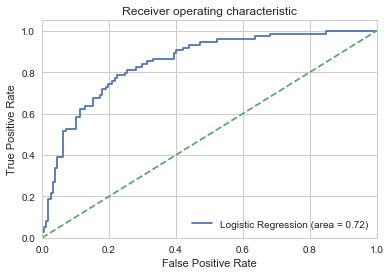

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
from sklearn import metrics, model_selection
predicted = model_selection.cross_val_predict(log_reg, X, y, cv=10)
metrics.accuracy_score(y, predicted) 
print (metrics.classification_report(y, predicted) )

             precision    recall  f1-score   support

          0       0.78      0.89      0.84       500
          1       0.73      0.54      0.62       268

avg / total       0.77      0.77      0.76       768



In [26]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(log_reg, X, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(log_reg, X, y, cv=10,scoring='accuracy').mean())

[ 0.74025974  0.75324675  0.80519481  0.71428571  0.74025974  0.77922078
  0.81818182  0.79220779  0.73684211  0.82894737]
0.770864661654
